In [1]:
from IPython.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

```
conda activate TVB #여기에 저장됨
```

In [2]:
import bct
import pandas as pd
import numpy as np
import os
import sys

# importing and making packages관련 :
https://stackoverflow.com/a/9049246/9042297  : 왜 (처음에) import utils 한 후에 utils.load_data하면 바로 안되는지(no package found라고 뜸)
* solutions : 
    1. `__init__.py`안에다가, `from .import load_data`라고 해야한다 $\rightarrow{}$ 나는 이걸 썼다
    2. 또는, `import utils.load__data`라고, 직접 importing할때 reference 해도 된다(단 이러면 여러개 import해야할때 귀찮아짐)



# 0. Importing Module/Data

In [3]:
#####IMPORTING utils module#####
## so that we can import from one directory above's utils
#https://blog.finxter.com/python-how-to-import-modules-from-another-folder/
sys.path.append("/scratch/connectome/dyhan316/TVB/REAL_RESEARCH")
sys.path

['/scratch/connectome/dyhan316/TVB/REAL_RESEARCH/Brain_Connectivity',
 '/usr/lib/python38.zip',
 '/usr/lib/python3.8',
 '/usr/lib/python3.8/lib-dynload',
 '',
 '/home/connectome/dyhan316/.local/lib/python3.8/site-packages',
 '/scratch/connectome/dyhan316/TVB/TVB_showcase/virtual_aging_showcase_copy/virtual_ageing',
 '/usr/local/lib/python3.8/dist-packages',
 '/usr/lib/python3/dist-packages',
 '/scratch/connectome/dyhan316/TVB/REAL_RESEARCH']

In [4]:
#####IMPORTING dataset/metadata and so on#####
data_dir = '/storage/bigdata/ABCD/TVB/data'
import utils #now imports becasue it looks at the last added sys path

dataset = utils.load_data.ABCDDataset(data_dir)  #이제 된다
subjects = dataset.list_subjects()
meta_data = utils.load_metadata.metadata(data_dir)

In [5]:
##looking at some examples
sample_sub = subjects[0]
print(subjects[:10])
print(dataset.load_sc(sample_sub).shape)   # load SC
print(dataset.load_bold(sample_sub).shape) # load BOLD
print(dataset.parcellation_100()) #the node names
meta_data.head()

['NDARINV0X4A2LKW', 'NDARINVRERRA7FD', 'NDARINV43M1L7PL', 'NDARINV6WH2N8P4', 'NDARINVFKFN7X0T', 'NDARINVYJETWGU1', 'NDARINVNUNMDE7M', 'NDARINVPUEXNZJU', 'NDARINVCYA7HWRK', 'NDARINVPXYXMXTH']
(84, 84)
(370, 84)
['L-AC', 'L-AM', 'L-BSTS', 'L-CA', 'L-CACG', 'L-CER', 'L-CMFG', 'L-CU', 'L-EC', 'L-FG', 'L-FP', 'L-HI', 'L-ICG', 'L-IN', 'L-IPG', 'L-ITG', 'L-LG', 'L-LOFG', 'L-LOG', 'L-MOFG', 'L-MTG', 'L-PA', 'L-PCAL', 'L-PCG', 'L-PCU', 'L-PHIG', 'L-POP', 'L-POR', 'L-PTR', 'L-PU', 'L-PaCG', 'L-PoCG', 'L-PrCG', 'L-RACG', 'L-RMFG', 'L-SFG', 'L-SMG', 'L-SPG', 'L-STG', 'L-TH', 'L-TP', 'L-TTG', 'R-AC', 'R-AM', 'R-BSTS', 'R-CA', 'R-CACG', 'R-CER', 'R-CMFG', 'R-CU', 'R-EC', 'R-FG', 'R-FP', 'R-HI', 'R-ICG', 'R-IN', 'R-IPG', 'R-ITG', 'R-LG', 'R-LOFG', 'R-LOG', 'R-MOFG', 'R-MTG', 'R-PA', 'R-PCAL', 'R-PCG', 'R-PCU', 'R-PHIG', 'R-POP', 'R-POR', 'R-PTR', 'R-PU', 'R-PaCG', 'R-PoCG', 'R-PrCG', 'R-RACG', 'R-RMFG', 'R-SFG', 'R-SMG', 'R-SPG', 'R-STG', 'R-TH', 'R-TP', 'R-TTG']


,Age,height,weight,BMI,vol,Sex,Education,income,married,race.ethnicity,abcd_site,morsex.1,morsex.2,ctsex.1,ctsex.2,morctsex.1,morctsex.2
ID_HBP,,,,,,,,,,,,,,,,,
NDARINVEFCVZYTR,130,56.500,118.000000,25.986060,1433652.836,Male,18,1,1,1,19,0.364884,0.635116,0.897505,0.102495,0.859503,0.140497
NDARINVJHX361ZP,119,51.875,65.333333,17.067658,1552107.042,Female,18,9,3,1,20,0.015770,0.984230,0.087163,0.912837,0.039306,0.960694
NDARINVNY4HU8H1,114,54.500,94.750000,22.425469,1600464.137,Female,18,10,3,1,9,0.214075,0.785925,0.792755,0.207245,0.050093,0.949907
NDARINV22C4YKXN,111,51.000,50.500000,13.649173,1423327.367,Female,18,10,1,1,9,0.185170,0.814830,0.596674,0.403326,0.455478,0.544522
NDARINVVX605DH1,114,52.750,70.000000,17.685137,1474259.573,Female,18,7,1,1,16,0.004610,0.995390,0.003111,0.996889,0.002103,0.997897


**soft warning**
1. BOLD data is not well registered (desikan killiany atlas이면) => new ROI extraction needed
    * 상윤쌤 said some nii didn't work => 어떻게 할지 모르겠다.. (talk later?)
2. ID_HBP, but not HBP (ABCD) (some naming missing, but didn't care ot change)

# 1. Brain Connectivity Measures (BCT) 써서 하기

참고 : 상윤쌤의
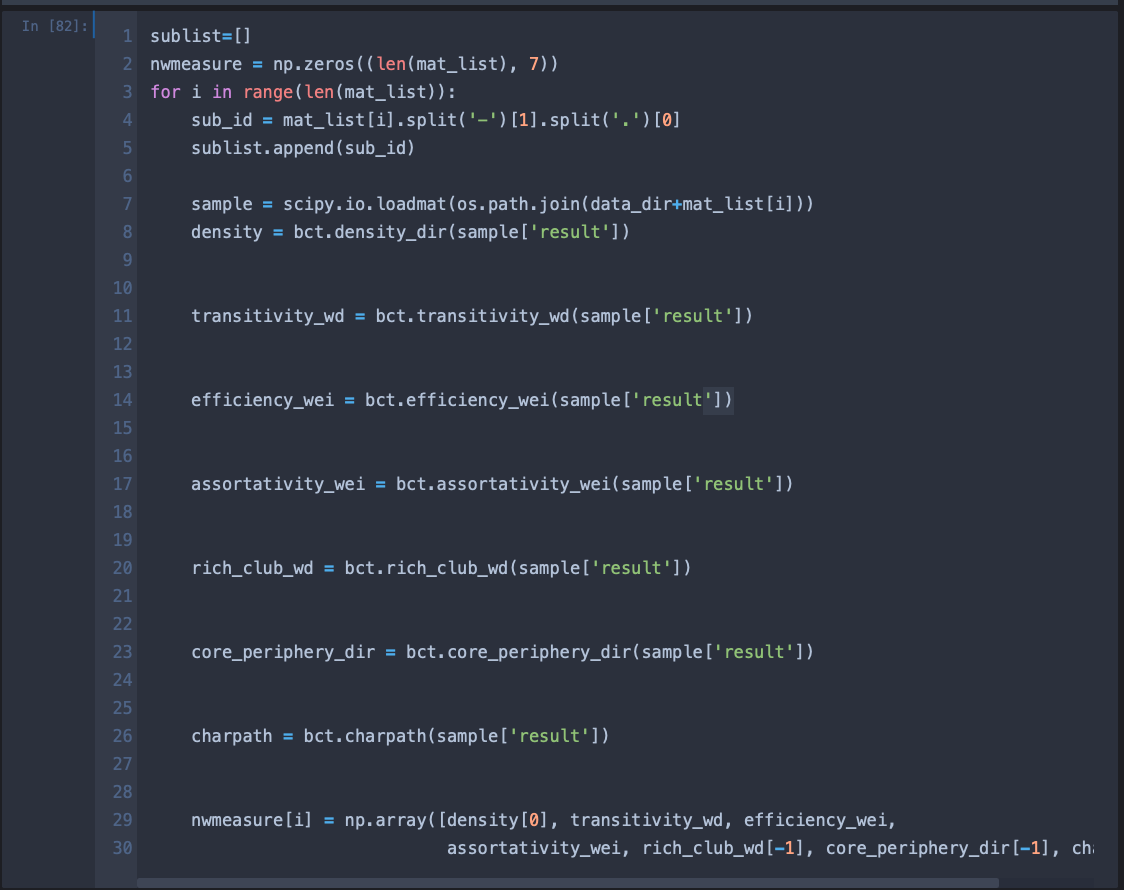
이파트가 모든 것을 for loop으로 한번에 하는 코드인 것 같다 (아직은 하지 말기, as I want to learn how it works before implementing it)

# X.X (numbering 나중에 고려하기)어떤 module들이 있고, 어느 것들을 implement해서 볼까?

implement할떄, 
> https://sites.google.com/site/bctnet/list-of-measures
여기에 있는 것들 쓰면 됨!!!


(function 이름이 bctpy랑 똑같다 (뒤에 .m extensino만 없에면)

(실제로 module내에서 뭐가 되어있는지 보고 싶으면 밑의 것들을 하면 된다)
```
help(bct) #help on the module itself
dir(bct) # lists all possible functions
help(bct.degrees_und) #실제 있는 하나의 functino중 하나봄
```


## 주의하기!! : bold의 경우, bold 가 아닌 FC를 만들어서 거기서 bct의 함수들을 써야한다!
* 이것을 FC folder을 따로 만들어서 거기서 뽑아서 쓸지, 아니면 돌릴떄마다 FC를 구하게 할지 두가지중 하나로 선택해야 할듯
    * 아마도 첫번째를 해야할듯 (기존의 storage folder에 있던 그 data folder에 subject 별로 새로운 FC_REAL folder 을 추가한 후, `load_data.py`의 method 중 하나로 넣어야 할듯(?))
    * 첫번째 해야하는 이유는, FC 계산할때마다 시간 거림


근데 생각해보니, FCD는 `load_data.py`처럼, 따로 `analysis.py`라든지 같은 sepearte module화 해야할듯 (bct에서 구현 안된거를 jupyter 에다가 구현하는 것은 일을 두번 하는 것이니)(아니면 `FCD.py`만들어서 거기다가 FCD 종류들 다 때려넣기?? ㅋㅋ)
   

In [24]:
#help(bct.modularity_und)이것 쓰기?

In [31]:
help(bct.modularity) #이거보면 사실 modularity종류가 엄청 많은 듯...?
#이거 이해하려면 => modularity 이론 공부를 더 해야함

Help on module bct.algorithms.modularity in bct.algorithms:

NAME
    bct.algorithms.modularity

FUNCTIONS
    ci2ls(ci)
        Convert from a community index vector to a 2D python list of modules
        The list is a pure python list, not requiring numpy.
        
        Parameters
        ----------
        ci : Nx1 np.ndarray
            the community index vector
        zeroindexed : bool
            If True, ci uses zero-indexing (lowest value is 0). Defaults to False.
        
        Returns
        -------
        ls : listof(list)
            pure python list with lowest value zero-indexed
            (regardless of zero-indexing parameter)
    
    community_louvain(W, gamma=1, ci=None, B='modularity', seed=None)
        The optimal community structure is a subdivision of the network into
        nonoverlapping groups of nodes which maximizes the number of within-group
        edges and minimizes the number of between-group edges.
        
        This function is a fast 

In [42]:
##some playing around with bct toolbox (modularity in particular)
sample_sc = dataset.load_sc(sample_sub)

print(bct.degrees_und(sample_sc))
print(bct.modularity_louvain_und(sample_sc))
print(bct.modularity_louvain_und_sign(sample_sc))
print(bct.modularity_probtune_und_sign(sample_sc))
print(bct.modularity_und(sample_sc))
#help(bct.module_degree_zscore)

[46. 35. 49. 54. 50. 42. 57. 45. 28. 48. 31. 54. 64. 69. 62. 59. 42. 50.
 59. 39. 55. 56. 37. 54. 66. 33. 51. 43. 41. 70. 45. 56. 61. 43. 61. 69.
 68. 69. 52. 73.  9. 32. 46. 45. 36. 63. 52. 49. 59. 43. 36. 44. 36. 55.
 61. 62. 69. 56. 47. 45. 62. 39. 55. 59. 45. 54. 62. 40. 43. 49. 47. 67.
 48. 58. 66. 53. 68. 73. 58. 71. 51. 74. 31. 26.]
(array([2, 1, 1, 2, 2, 5, 2, 1, 1, 1, 2, 1, 1, 2, 1, 1, 1, 2, 1, 2, 1, 2,
       1, 2, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 2, 2, 1, 3, 4,
       4, 3, 3, 5, 3, 4, 4, 4, 3, 4, 4, 3, 4, 4, 4, 3, 4, 3, 4, 3, 4, 4,
       4, 4, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 4, 3, 4, 4]), 0.5511812950461041)
(array([2, 3, 3, 2, 2, 1, 2, 3, 3, 3, 2, 3, 3, 2, 3, 3, 3, 2, 3, 2, 3, 2,
       3, 2, 3, 3, 2, 2, 2, 2, 2, 3, 2, 2, 2, 2, 3, 3, 3, 2, 2, 3, 5, 5,
       4, 5, 5, 1, 5, 4, 4, 4, 5, 4, 4, 5, 4, 4, 4, 5, 4, 5, 4, 5, 4, 5,
       4, 4, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 4, 4, 5, 4, 4]), 0.550389709645534)
(array([14, 32, 21,  2, 37, 10, 20, 40, 32,  9,  5, 1

In [15]:
#help(bct) #help
#dir(bct) # lists all possible functions
#help(bct.degrees_und)

['BCTPY',
 'BCTParamError',
 'BETZEL2016',
 'BLONDEL2008',
 'BOLDI2009',
 'BRANDES2001',
 'BibTeX',
 'COLIZZA2006',
 'COSTANTINI2014',
 'ESTRADA2005',
 'ESTRADA2010',
 'FAGIOLO2007',
 'FOSTER2010',
 'GOOD2010',
 'GUIMERA2005',
 'HAGMANN2008',
 'HEUVEL2011',
 'HIDALGO2007',
 'HONEY2007',
 'HUMPHRIES2008',
 'KINTALI2008',
 'LANCICHINETTI2012',
 'LATORA2001',
 'LEICHT2008',
 'MASLOV2002',
 'MEILA2007',
 'MORRISON2005',
 'NEWMAN2002',
 'NEWMAN2016',
 'ONNELA2005',
 'OPSAHL2008',
 'RAVASZ2002',
 'REICHARDT2006',
 'RUBINOV2010',
 'RUBINOV2011',
 'SHANNON1948',
 'SPORNS2004',
 'SUN2008',
 'WATTS1998',
 'YIP2007',
 'ZALESKY2010',
 'ZHANG2005',
 '__builtins__',
 '__cached__',
 '__citation__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 '__version__',
 '__version_info__',
 'adjacency_plot_und',
 'agreement',
 'agreement_weighted',
 'algorithms',
 'align_matrices',
 'assortativity_bin',
 'assortativity_wei',
 'autofix',
 'backbone_wu',
 'between

## LOOK AT (참조)

http://localhost:11111/notebooks/TVB/TVB_showcase/virtual_aging_showcase/virtual_ageing/notebooks/1_BNM_for_resting_state.ipynb
and http://localhost:11111/notebooks/TVB/REAL_RESEARCH/Brain_Connectivity/Stella_code_BCT.ipynb
and http://localhost:11111/notebooks/TVB/virtual_aging_brain/notebooks/01_vab_github_sc_investigation.ipynb (intra-SC masking and so on이 여기다가 구현되어있다)


* http://localhost:11111/tree/TVB/virtual_aging_brain/src : data.py, analysis.py등등에서 FCD이미 구현한 것들도 많다


# TODO
0. 논문읽고, 어떤 metric이 쓰였는지, 그리고 그런 논문들의 github을 가져와서든지 해서 우리만의 toolbox를 만들기
1. SINCE ABCD HAS TOO FMRI SESSIONS, BOTH MUST BE DONE!
2. ALSO, FMRI REGISTRATION ERROR해결해야함 (deskian atlas 쓸꺼면)
3. **cognitive scores** 추가하기 (지금은 morsex이런 것들 밖에 없는데 나중에 할꺼면 다 추가할 것 => 따라서, 모든 data가 필요하다!(cognitive data)
    * 이렇게 하기 위해서는 cognitive data가 있는 것을 따로 만들어야 한다
    * 근데, 이것을 metadata csv file을 바꿈으로서 만들기 보다는, 따로 "cognitive scores"라는 csv파일을 만들어서 거기다가 하자 (이렇게 나누는게 나중에 다루기 편할 듯)
    * 즉, 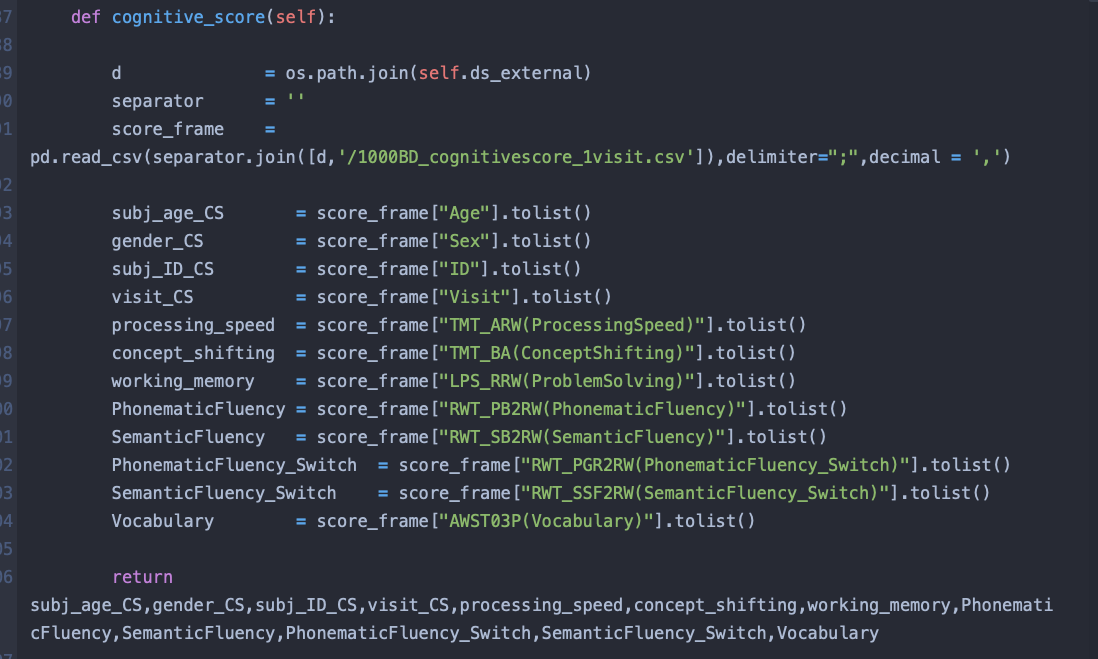 이 이미지 처럼, `pd.read_csv(separator.join([d,'/1000BD_cognitivescore_1visit.csv']),delimiter=";",decimal = ',')` 이런 `1000BD_cognitivescore_1visit.csv`를 따로 만들어서 거기서 쓰자 
> **<mark>(기존의 metadata csv를 더 길게 만들지 말고) 새로운 cogntiive score csv 만들기!</mark>**

* other todos : 이름을 바꾸기 (HBP, 100N4등등으로 썼는데, 사실은 desikan killiany고 ABCD 이고 그럼 (솔직히 function에는 큰 지장 없음)

## other todos (lower priority, but still has to be done)
1. parallel computing하는 것 implement하기 (using Unicore or sth)
2. rfmri session 2개 모두 하기 
    * 나중에 FCD할때 두개의 FCD를 평균내야함 (use more data)

## other things to note (warnings)

1. FC 폴더에 있는 두개는 사실 같은 거다 (원래는 atlas가 달라야 하는가 그런걸로 기억하는데 그렇지 않음)
    * 즉 밑의 사진에서, FC폴더밑에 있는 두 txt가 사실은 동일한 것! (아마도 내가 뭔지 몰라서 똑같게 했는 듯) 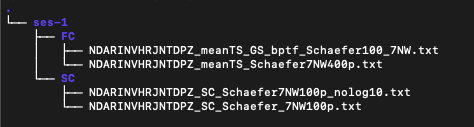
    * 알고보니, 위의 폴더가 FC 가 아닌 BOLD가 되어야하네..?  (일단은 무시)

In [22]:
##proof both FC data are the same

used_data = np.loadtxt("/storage/bigdata/ABCD/TVB/data/external/Julich/NDARINVHRJNTDPZ/ses-1/FC/NDARINVHRJNTDPZ_meanTS_GS_bptf_Schaefer100_7NW.txt")
unused_data = np.loadtxt("/storage/bigdata/ABCD/TVB/data/external/Julich/NDARINVHRJNTDPZ/ses-1/FC/NDARINVHRJNTDPZ_meanTS_Schaefer7NW400p.txt")

print(np.all(used_data == unused_data))

True
